### MLP Model 7(400-256-100-1) using STFT Dataset

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg

import tensorflow as tf
from tensorflow import keras
import pickle

In [3]:
# Importing the Training data from pickle file 
pickle_in = open("C:/Users/Rathi/ml/EE258_Proj-II/X_train_T2.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("C:/Users/Rathi/ml/EE258_Proj-II/y_train_T2.pickle","rb")
y_train = pickle.load(pickle_in)


In [4]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)

X_train : (4431, 100)
y_train : (4431,)


In [5]:
X_train=X_train.replace([np.inf, -np.inf, np.nan], 0)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [6]:
#In Model 6 we increased the no of neurons in the first hidden layer 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
NN_model = Sequential()
#kernel_regularizer = regularizers.l1_l2(l1=0.0001 , l2=0.0001)
#bias_regularizer=regularizers.l2(0.001)

# The Input Layer :
NN_model.add(Dense(400,input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(100,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=20)
callbacks_list = [early_stopping_monitor]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               40400     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               102656    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 168,857
Trainable params: 168,857
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Model fit
#NN_model.fit(X_train, y_train, epochs=250, batch_size=1, validation_split = 0.02 , callbacks=callbacks_list )
NN_model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
4431/4431 [==============================] - 5s 1ms/step - loss: 10426110.0000 - mean_absolute_error: 10426110.0000
Epoch 2/100
4431/4431 [==============================] - 5s 1ms/step - loss: 7687050.0000 - mean_absolute_error: 7687050.0000
Epoch 3/100
4431/4431 [==============================] - 5s 1ms/step - loss: 6895045.5000 - mean_absolute_error: 6895045.5000
Epoch 4/100
4431/4431 [==============================] - 6s 1ms/step - loss: 6349273.0000 - mean_absolute_error: 6349273.0000
Epoch 5/100
4431/4431 [==============================] - 5s 1ms/step - loss: 5826159.0000 - mean_absolute_error: 5826159.0000
Epoch 6/100
4431/4431 [==============================] - 5s 1ms/step - loss: 5600163.0000 - mean_absolute_error: 5600163.0000
Epoch 7/100
4431/4431 [==============================] - 5s 1ms/step - loss: 5283145.5000 - mean_absolute_error: 5283145.5000
Epoch 8/100
4431/4431 [==============================] - 5s 1ms/step - loss: 5134981.0000 - mean_absolute_error: 513

4431/4431 [==============================] - 5s 1ms/step - loss: 2176148.7500 - mean_absolute_error: 2176148.7500
Epoch 66/100
4431/4431 [==============================] - 5s 1ms/step - loss: 2178058.7500 - mean_absolute_error: 2178058.7500
Epoch 67/100
4431/4431 [==============================] - ETA: 0s - loss: 2152416.2500 - mean_absolute_error: 2152416.250 - 5s 1ms/step - loss: 2151355.7500 - mean_absolute_error: 2151355.7500
Epoch 68/100
4431/4431 [==============================] - 5s 1ms/step - loss: 2104122.7500 - mean_absolute_error: 2104122.7500
Epoch 69/100
4431/4431 [==============================] - 5s 1ms/step - loss: 2131356.2500 - mean_absolute_error: 2131356.2500
Epoch 70/100
4431/4431 [==============================] - 5s 1ms/step - loss: 2142219.7500 - mean_absolute_error: 2142219.7500
Epoch 71/100
4431/4431 [==============================] - 5s 1ms/step - loss: 2091367.1250 - mean_absolute_error: 2091367.1250
Epoch 72/100
4431/4431 [==============================] - 

In [8]:
#Saving the model for Ensembling
filename = 'model_F8T2.h5'
NN_model.save(filename)

In [9]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual.values.ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

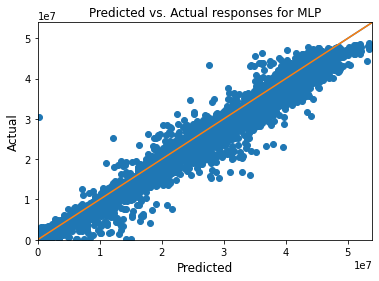

In [10]:
##Best fit line for Training data 
plotfig(NN_model.predict(X_train), y_train, 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [11]:
#Importing the test data
pickle_in = open("C:/Users/Rathi/ml/EE258_Proj-II/X_test_T2.pickle","rb")
X_test = pickle.load(pickle_in)

In [12]:
predictions = NN_model.predict(X_test)
print(predictions)

[[13317388.]
 [42105110.]
 [27502922.]
 ...
 [19397004.]
 [41100908.]
 [29934242.]]


In [12]:
predictions.shape

(4520, 1)

In [13]:
testsub =  pd.read_csv('C:/Datasets/predict-volcanic-eruptions-ingv-oe/sample_submission.csv')

In [14]:
#Creating Submission file to kaggle
submission = pd.DataFrame()
submission['segment_id'] = testsub['segment_id']
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP_121320_F7T2.csv', header=True, index=False)